In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv("archive/US_Accidents_March23.csv")
df = pd.read_csv("archive/US_Accidents_March23.csv",parse_dates=['Start_Time', 'End_Time'])


In [3]:
bool_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
        'Traffic_Signal', 'Turning_Loop']

false_counts = (df[bool_cols] == False).sum().sort_values(ascending = False)


for col, count in false_counts.items():
    print(f"False entries in {col} : {count}  => {(count/df.shape[0])*100:.2f}")

False entries in Turning_Loop : 7728394  => 100.00
False entries in Roundabout : 7728145  => 100.00
False entries in Bump : 7724880  => 99.95
False entries in Traffic_Calming : 7720796  => 99.90
False entries in No_Exit : 7708849  => 99.75
False entries in Give_Way : 7691812  => 99.53
False entries in Railway : 7661415  => 99.13
False entries in Amenity : 7632060  => 98.75
False entries in Station : 7526493  => 97.39
False entries in Stop : 7514023  => 97.23
False entries in Junction : 7157052  => 92.61
False entries in Crossing : 6854631  => 88.69
False entries in Traffic_Signal : 6584622  => 85.20


In [4]:
#These boolean columns are almost completely false so they are not useful apart from last three 3 columsn 


df_bool_dropped = df.drop(['Amenity','Bump','Give_Way','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop'],axis='columns')


In [5]:
df_drop = df_bool_dropped.drop(['End_Lat','End_Lng'],axis = 'columns')

In [6]:
bool_cols = ['Junction', 'Crossing', 'Traffic_Signal']
df_drop[bool_cols] = df_drop[bool_cols].astype(int)


In [7]:
for col in df_drop.columns:
    unique_count = df_drop[col].nunique()
    print(f"Unique entries in {col} : {unique_count}")


Unique entries in ID : 7728394
Unique entries in Source : 3
Unique entries in Severity : 4
Unique entries in Start_Time : 6131796
Unique entries in End_Time : 6705355
Unique entries in Start_Lat : 2428358
Unique entries in Start_Lng : 2482533
Unique entries in Distance(mi) : 22382
Unique entries in Description : 3761578
Unique entries in Street : 336306
Unique entries in City : 13678
Unique entries in County : 1871
Unique entries in State : 49
Unique entries in Zipcode : 825094
Unique entries in Country : 1
Unique entries in Timezone : 4
Unique entries in Airport_Code : 2045
Unique entries in Weather_Timestamp : 941331
Unique entries in Temperature(F) : 860
Unique entries in Wind_Chill(F) : 1001
Unique entries in Humidity(%) : 100
Unique entries in Pressure(in) : 1144
Unique entries in Visibility(mi) : 92
Unique entries in Wind_Direction : 24
Unique entries in Wind_Speed(mph) : 184
Unique entries in Precipitation(in) : 299
Unique entries in Weather_Condition : 144
Unique entries in Cro

In [8]:
df_drop = df_drop.drop(['Country'],axis='columns')

In [9]:
# its just the time when weather was recorded so not useful
df_drop = df_drop.drop(['Weather_Timestamp'],axis='columns')

In [10]:
df_drop = df_drop.drop(['ID'],axis='columns')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
numeric_cols = ["Precipitation(in)", "Wind_Speed(mph)", "Visibility(mi)", "Pressure(in)",
                "Humidity(%)", "Wind_Chill(F)", "Temperature(F)", "Distance(mi)", "Start_Lng", "Start_Lat"]

In [15]:
df_drop = df_drop.sample(10000)

C:\Users\butta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\butta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\butta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\butta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

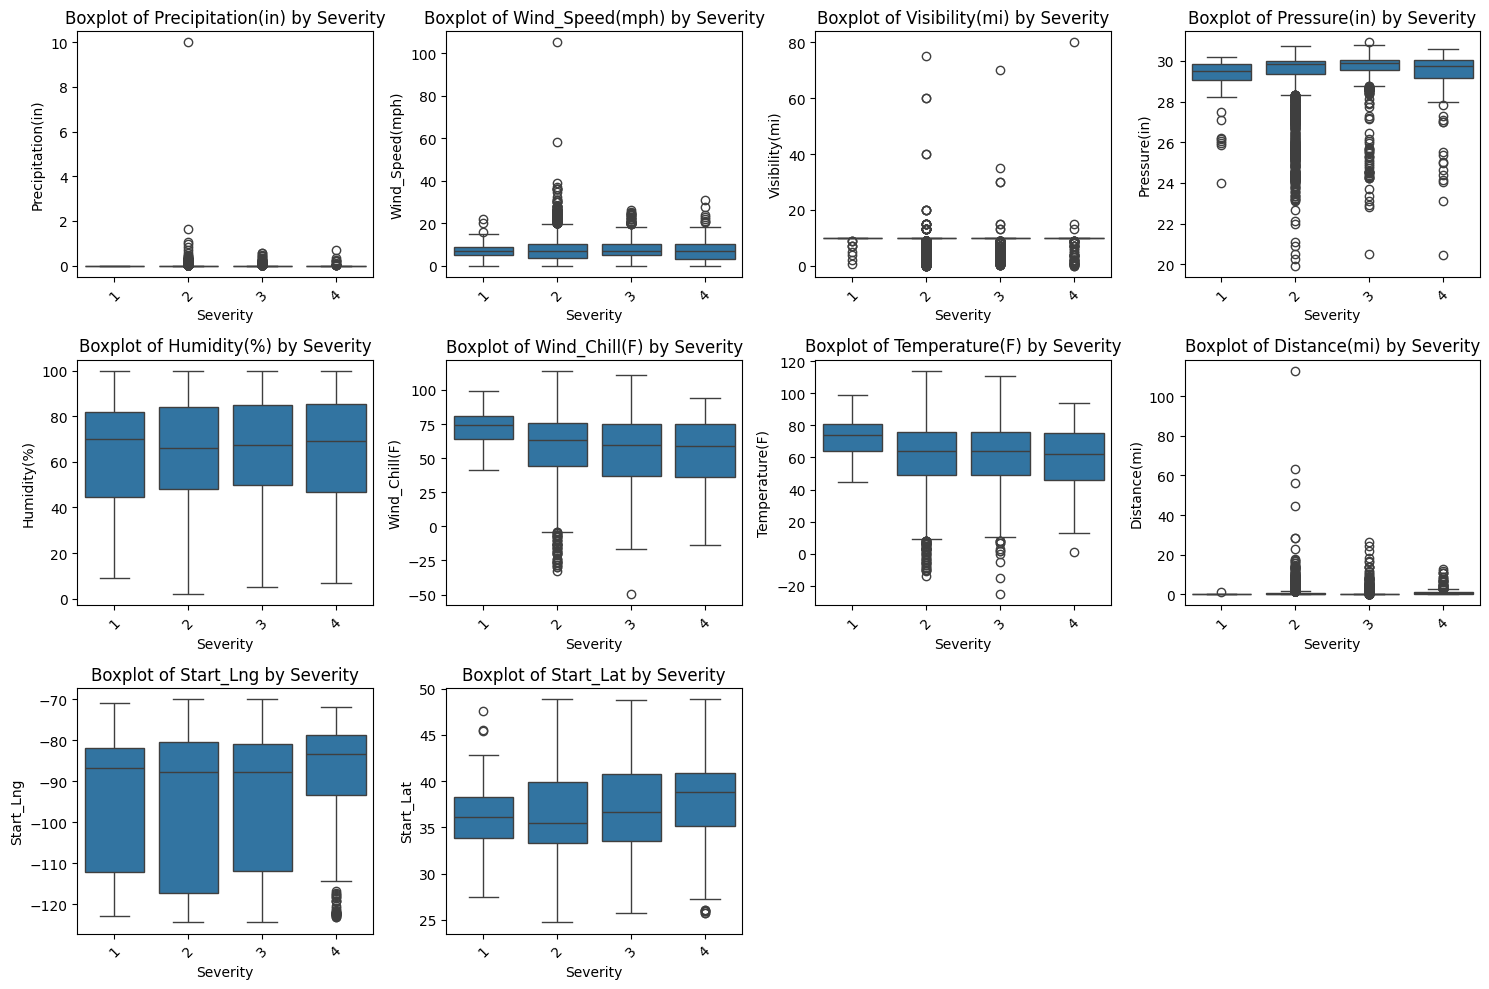

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)  
    sns.boxplot(data=df_drop, x='Severity', y=col) 
    plt.title(f'Boxplot of {col} by Severity')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
def remove_outliers_iqr(df, numeric_cols):

    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [18]:
df_drop = remove_outliers_iqr(df_drop, numeric_cols)

C:\Users\butta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\butta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\butta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\butta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

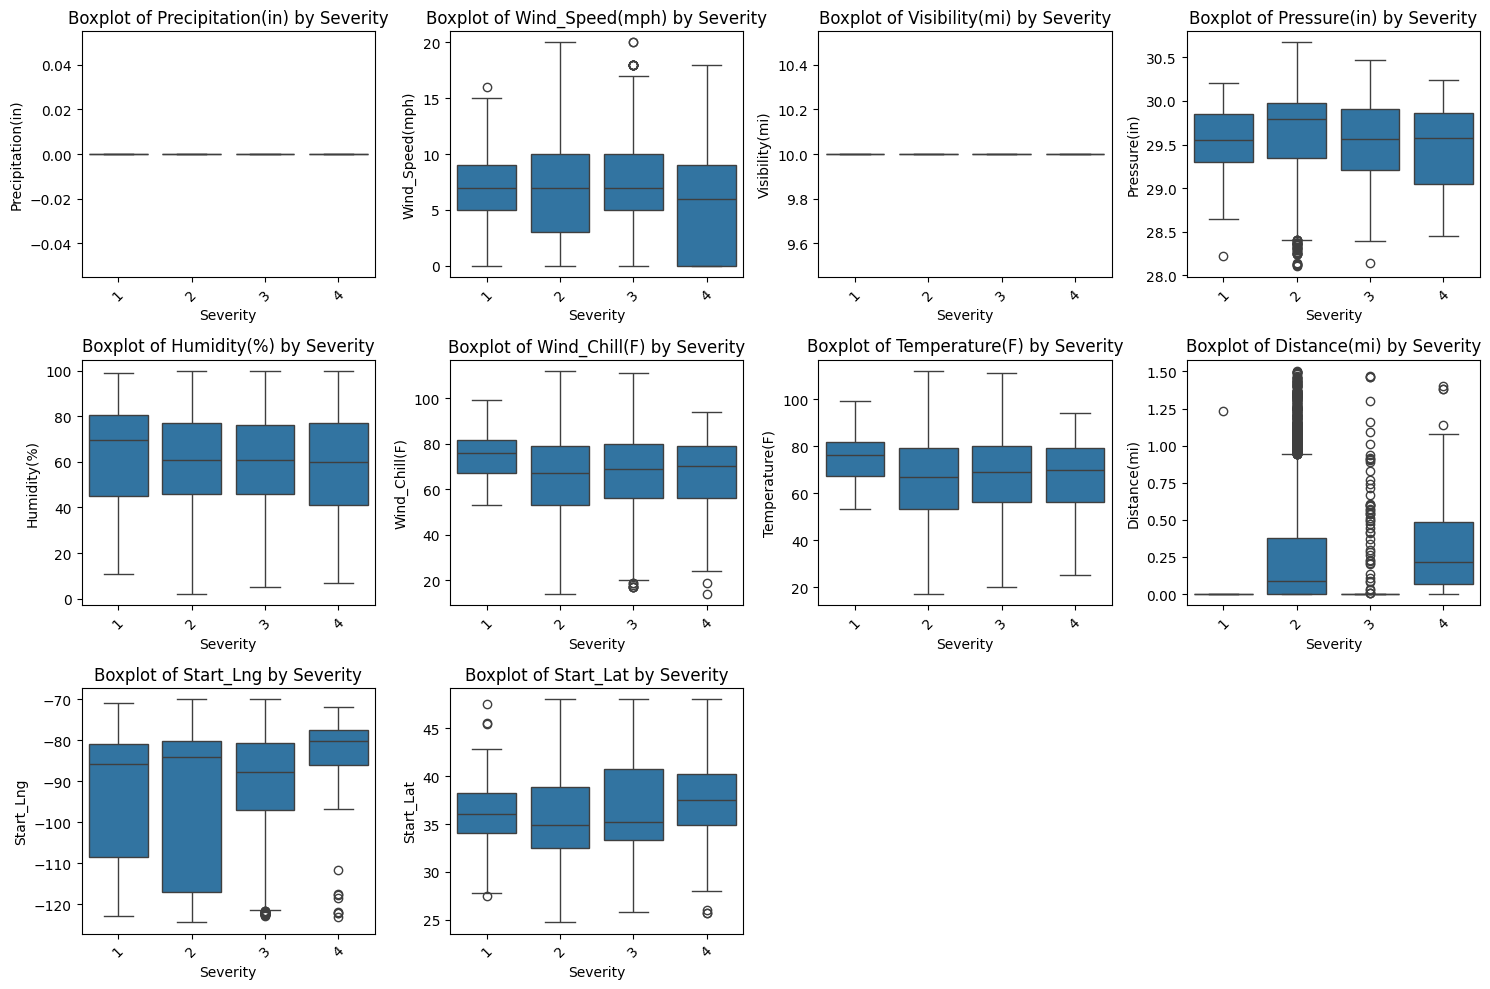

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)  
    sns.boxplot(data=df_drop, x='Severity', y=col) 
    plt.title(f'Boxplot of {col} by Severity')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()